<b> Vamos a hacer algunos ejemplos de convolución y sistemas LTI. Empezamos cargando algunas librerías: </b> 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft, signal
import sys
sys.path.insert(1, 'Some functions/')
from generate_signals import *

Empecemos con un ejemplo ya visto en la clase. Sea $h(t)=u(t)$ y $x(t)=e^{-\alpha t}u(t)$ con $0<\alpha$. Queremos calcular $y(t)=h(t)*x(t)$. Empecemos tomando algunas definiciones para "simular" señales de tiempo continuo en la computadora. 

In [2]:
# Signal duration in seconds
D = 15
# Sampling rate in Hz
fs = 1000
#Sampling period
T = 1/fs


Vamos a generar las señales $h(t)$ y $x(t)$.

In [3]:
amplitude = 1
alpha = -1
sample_rate = fs
duration = D
position = 0.5   #Position of impulse. Value between 0 a 1. The start of exponential will be positioned in the index closer 
                 #to duration*position 
tx,x=generate_right_exponential(amplitude,alpha, sample_rate, duration, position)  

In [4]:
amplitude = 1
alpha = 0
sample_rate = fs
duration = D
position = 0.5   #Position of impulse. Value between 0 a 1. The start of exponential will be positioned in the index closer 
                 #to duration*position 
th,h=generate_right_exponential(amplitude,alpha, sample_rate, duration, position)  

In [5]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(tx-position*duration, x, label='Señal x(t)')   # Notar que desplazamos el eje del tiempo para que veamos la señal como que empieza en t=0. Esto es una cuestión simplemente
                                                        # de visualización, ya que el cero de tiempo lo ponemos en el indice del array que contiene la señal x(t) 
                                                        # en donde más nos convenga.
plt.plot(tx-position*duration, h, label='Señal h(t)')   #Como las señales se generan con los mismos parámetros de duration y sample_rate tx=th asi que puedo usar cualquiera.
plt.grid()
plt.legend(loc='best')
plt.show()

Para realizar la convolución vamos a usar el método [convolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html#scipy.signal.convolve) de [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html). Miren un poco la documentación para entender como usarlo. Hay cosas que todavía no van a entender pero
a medida que avancemos con la materia muchas cosas quedarán más claras!

La sintaxis general del comando es 

output=signal.convolve(in1, in2, mode='full', method='auto')

donde in1 y in2 son los arrays de las señales a convolucionar (tienen que ser el mismo número de dimensiones pero no necesariamente del mismo tamaño). 

El argumento mode específica particularidades de el array de salida. El que usaremos el modo por defecto que es 'full'. 

El argumento method especifica como se computará la convolución. El default que es 'auto' permite que el programa selecciona el método más eficiente en término de recursos y tiempo. También están 'direct' y 'fft'. El segunda hace la convolución vía transformadas de Fourier (lo veremos más adelante). El 'direct' es método estandar que implementa la convolucion con productos y sumas (o integrales) tal como vimos en clase.

In [6]:
y=signal.convolve(x, h, mode='full', method='direct')

Veamos el tamaño de las entradas y la  salida

In [7]:
print(h.shape)
print(x.shape)
print(y.shape)

(15000,)
(15000,)
(29999,)


Vemos que el tamaño de la salida es igual a igual al doble de la entradas menos 1. En general, para entradas de distinto tamaño va a ser $N_y=N_x+N_h-1$.

Para graficar con el eje temporal tal como teniamos arriba tenemos que tener en cuenta esto. Sino podemos graficar directamente la salida sin referencia al eje temporal

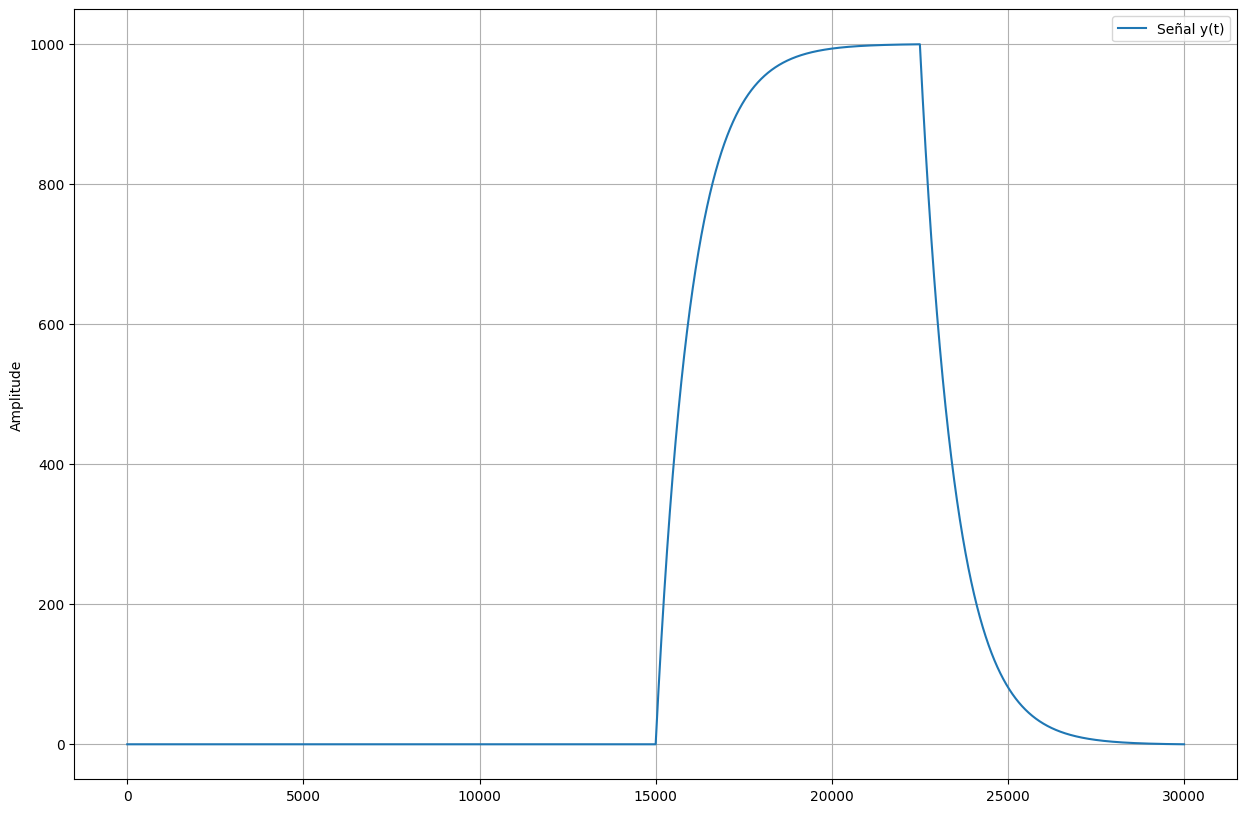

In [8]:
plt.figure(figsize=(15, 10))
plt.ylabel('Amplitude')
plt.plot(y, label='Señal y(t)')   
plt.legend(loc='best')
plt.grid()
plt.show()

<b> Qué pasó??? Es correcto el resultado?? </b> 

Corrijamos esto: vamos usar mode='same'. Esto fuerza a que la salida tenga la misma dimension que el array in1 y que al hacer la convolución, la función no nos
haga un zero padding de $x(t)$ y $h(t)$ para llevarlas dimensión $N_y=N_x+N_h-1$ para luego hacer la convolución!

In [9]:
y=signal.convolve(x, h, mode='same', method='direct')

In [10]:
print(h.shape)
print(x.shape)
print(y.shape)

(15000,)
(15000,)
(15000,)


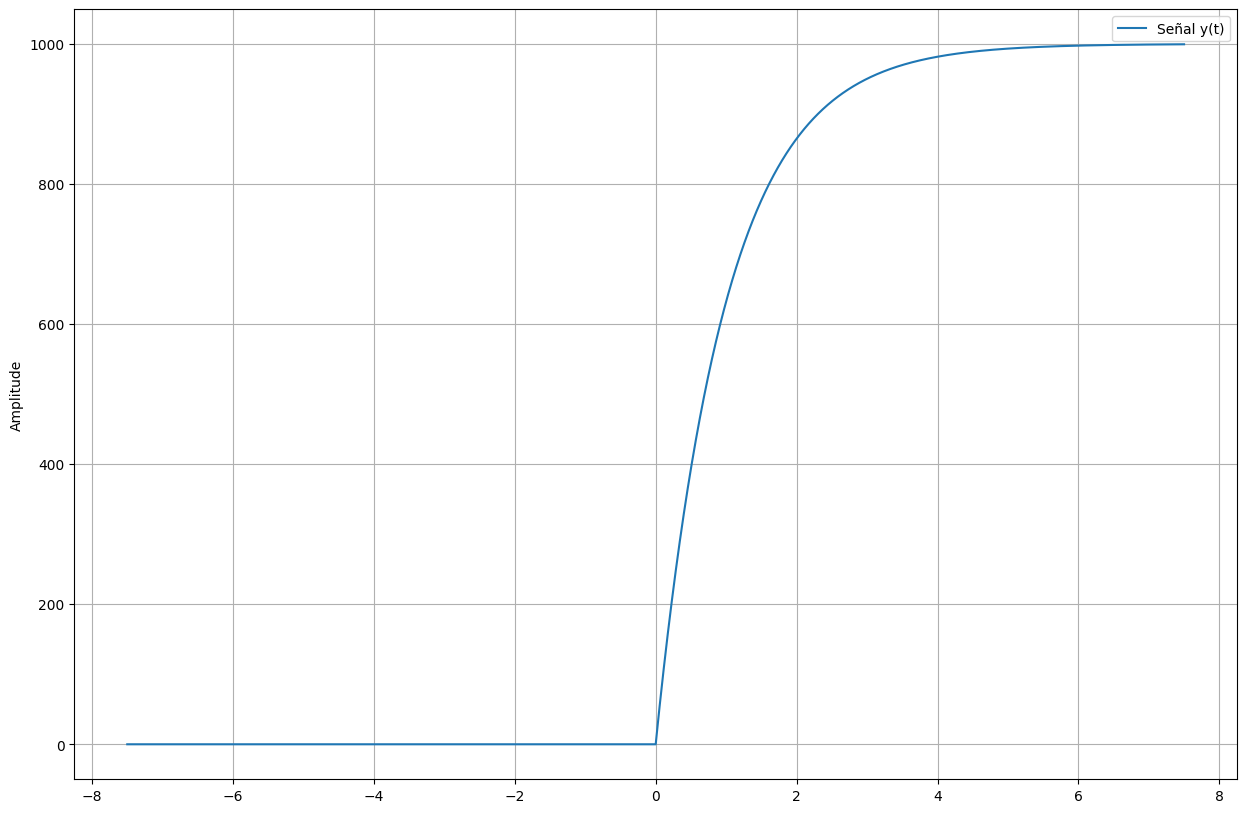

In [11]:
plt.figure(figsize=(15, 10))
plt.ylabel('Amplitude')
plt.plot(tx-position*duration, y, label='Señal y(t)')   
plt.legend(loc='best')
plt.grid()
plt.show()

Conclusión: usar este comando para realizar la convolución es muy útil. Pero como ven, para usarlo hay que saber un poco de la teoría (lo que hacemos en esta materia)
y tener claro como se implementan estas funciones. Como regla general para hacer una convolución entre dos señales lo que se puede hacer es hacer que la primera de ellas tenga una duración que capture la parte importante de dicha señal. La otra la hacemos "lo suficientemente larga" para que al momento de "deslizarse" sobre la primera capture todos los detalles de la misma. Con el mode='same' fijamos que la salida tenga la longitud de la primer señal y deberiamos apreciar prácticamente todos los detalles importantes de la señal de salida. Esto igual depende de la situación y de que queramos ver en la salida. Las otras opciones del argumento mode existen porque tienen su utilidad. Es importante que jueguen un poco con ejemplos conocidos para ver como esos parámetros influyen en los resultados, ya que no hay forma "canónica" de usar este comando. Lo más importante al final del dia es siempre

<b> ANALIZAR LOS RESULTADOS OBTENIDOS Y PENSAR Y RAZONAR SI TIENEN SENTIDO. MUCHAS VECES NO SABEMOS EXACTAMENTE QUE ES LO QUE TIENE QUE ENTREGARNOS UN COMANDO O EL RESULTADO FINAL CORRECTO DE UN EJERCICIO. PERO CASI SIEMPRE PODEMOS RAZONAR SI ALGÚN RESULTADO TIENE SENTIDO O NO! </b>

Lo mismo pasa para los comandos equivalentes en Matlab, Octave, etc. 

Repitamos este ejemplo para el caso equivalente de tiempo discreto que también consideramos en clase: Sea $x[n]=\alpha^nu[n]$ con $0<\alpha< 1$y $h[n]=u[n]$. En realidad esto lo podemos implementar con las mismas herramientas que usamos arriba (no nos olvidemos que la computadora en realidad trabaja con señales de tiempo discreto!). Por completitud y porque las funciones que usamos lo requieren vamos a definir los parámetros que usamos arriba para "simular" señales de tiempo continuo: 

In [12]:
# Signal duration in samples
D = 50
# Sampling rate in Hz
fs = 1      
#Sampling period
T = 1/fs

Generemos $h[n]$ y $x[n]$:

In [13]:
amplitude = 1
alpha = 0
sample_rate = fs
duration = D
position = 0.5   #Position of impulse. Value between 0 a 1. The start of exponential will be positioned in the index closer 
                 #to duration*position 
nh,h=generate_right_exponential(amplitude,alpha, sample_rate, duration, position)  

Para generar $\alpha^nu[n]$ usando la misma función que usamos arriba para generar exponenciales continuas tengamos en cuenta lo siguiente. El valor de $\alpha$ que requerimos
ahora se puede escribir como $\alpha=e^{\alpha_{c}}$ donde $\alpha_c$ es el usado anteriormente. Supongamos que deseo que $\alpha=\frac{1}{2}$ entonces $\alpha_c=\ln \left(\frac{1}{2}\right)$ y este es el valor a usar en la función.

In [14]:
amplitude = 1
alpha_c = np.log(0.5)
sample_rate = fs
duration = D
position = 0.5   #Position of impulse. Value between 0 a 1. The start of exponential will be positioned in the index closer 
                 #to duration*position 
nx,x=generate_right_exponential(amplitude,alpha_c, sample_rate, duration, position)  

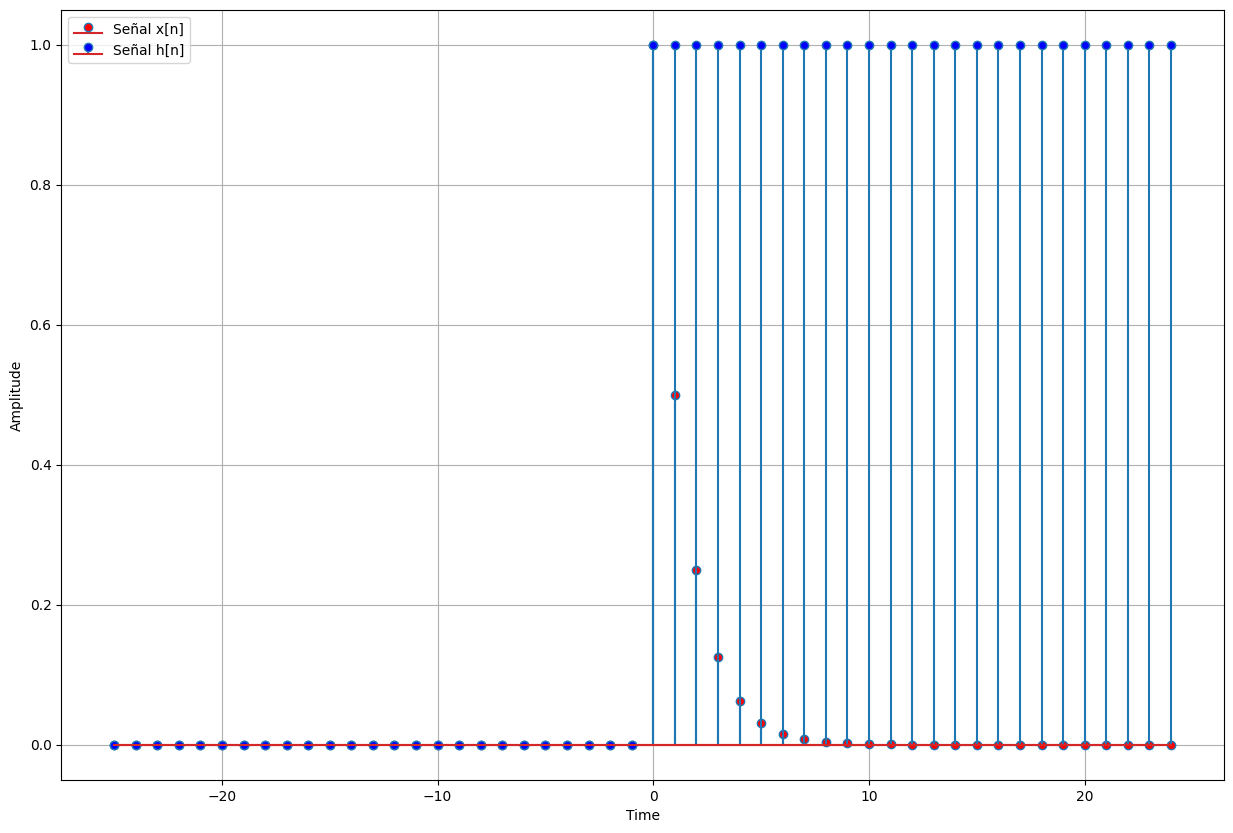

In [15]:
plt.figure(figsize=(15, 10))
plt.xlabel('Time')
plt.ylabel('Amplitude')
markerline1, stemlines1, baseline1 = plt.stem(nx-position*duration, x, label='Señal x[n]')  
markerline1.set_markerfacecolor('red')
markerline2, stemlines2, baseline2 = plt.stem(nx-position*duration, h, label='Señal h[n]')   
markerline2.set_markerfacecolor('blue') 
plt.grid()
plt.legend(loc='best')
plt.show()

In [16]:
y=signal.convolve(x, h, mode='same', method='direct')

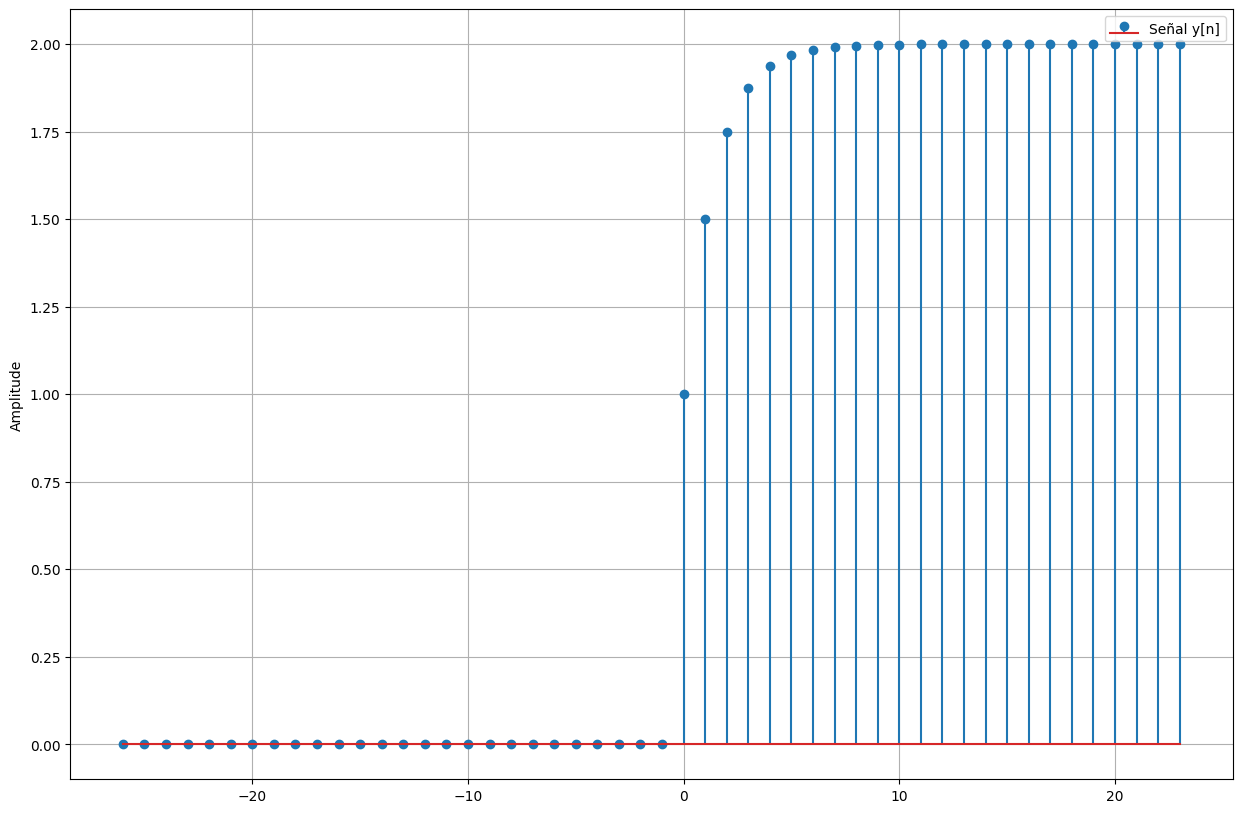

In [17]:
plt.figure(figsize=(15, 10))
plt.ylabel('Amplitude')
plt.stem(nx-round(position*duration+1), y, label='Señal y[n]')   
plt.legend(loc='best')
plt.grid()
plt.show()

<b> Veamos algunos sistemas LTI descriptos por ecuaciones en diferencias: </b> 

Consideremos este tipo de ecuaciones

$$ \sum_{k=0}^N a_ky[n-k]=\sum_{k=0}^M b_k x[n-k] $$

Para realizar la convolución vamos a usar el método [lfilter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html) de [scipy.signal](https://docs.scipy.org/doc/scipy/reference/signal.html). 
Miren un poco la documentación para entender como usarlo. Hay cosas que todavía no van a entender pero a medida que avancemos con la materia muchas cosas quedarán más claras!

Implementemos la siguiente ecuación en diferencias $y[n]= 0.9 y[n-1]+x[n]$. Para ello vamos a definir los coeficientes $a[k]$ y los coeficientes $b[k]$ de esta ecuación.

In [18]:
a=[1, -0.9]
b= [1]

Notar que para la definición de los coeficientes $a[k]$ se considera la siguiente forma de la ecuación:
 $$a[0]*y[n] = b[0]*x[n] + b[1]*x[n-1] + ... + b[M]*x[n-M]
                      - a[1]*y[n-1] - ... - a[N]*y[n-N] $$

Vamos a usar como señal de entrada un impulso, o sea $x[n]=\delta[n]$.

In [19]:
# Signal duration in samples
D = 50
# Sampling rate in Hz
fs = 1      
#Sampling period
T = 1/fs


In [20]:
amplitude = 1
sample_rate = fs
duration = D
position = 0     #Position of impulse. Value between 0 a 1. The start of exponential will be positioned in the index closer 
                 #to duration*position 
n,x = generate_impulse(amplitude, sample_rate, duration, position)

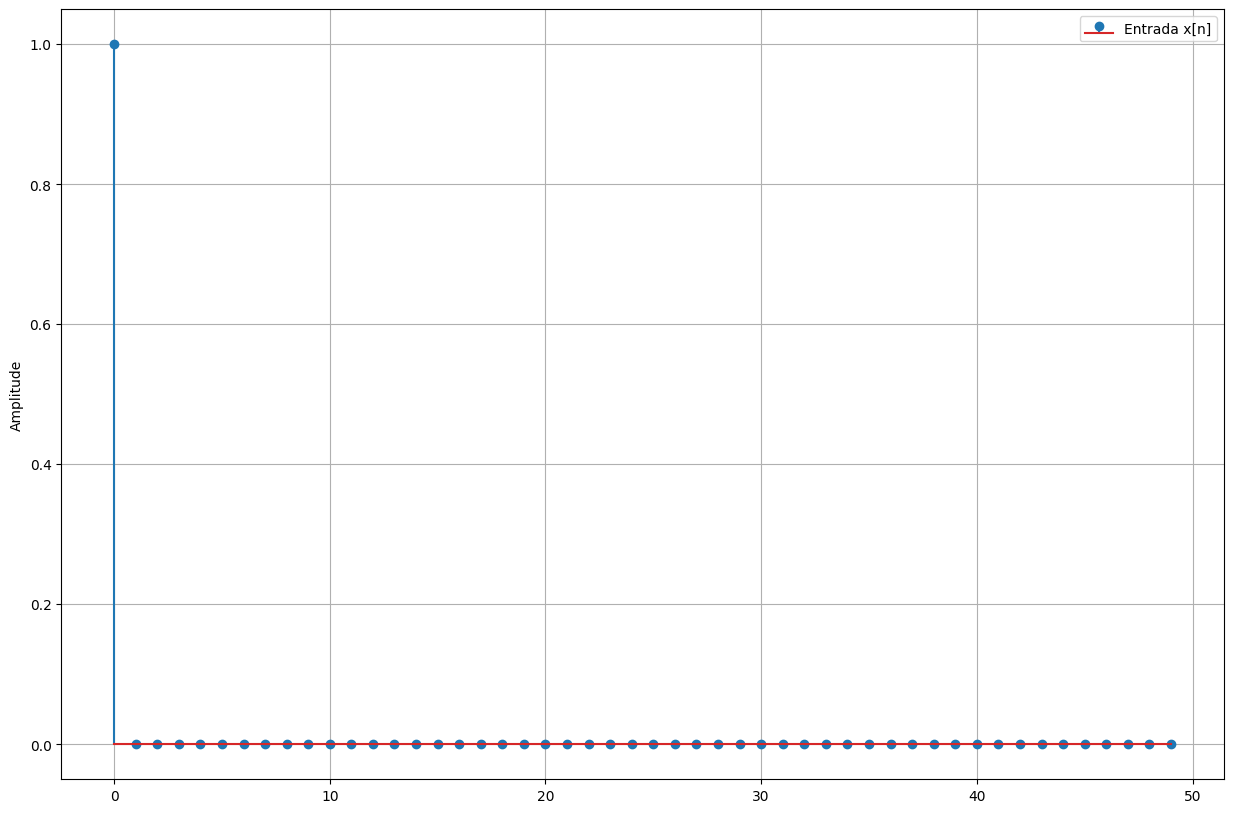

In [21]:
plt.figure(figsize=(15, 10))
plt.ylabel('Amplitude')
plt.stem(x, label='Entrada x[n]')  
plt.legend(loc='best')
plt.grid()
plt.show()

Implementemos la ecuación para obtener su salida

In [22]:
y = signal.lfilter(b, a, x, axis=-1, zi=None)

La opción axis=-1 es default y se puede obviar si se quiere cuando se trabajan con array 1D como es nuestro caso. zi=None también es default y lo que indica es que se usará la condición de reposo inicial. 
En general zi es un array cuyas componentes se relacionan con la condiciones iniciales que deseemos para la ecuación en diferencias. Si dichas condiciones son los valores $y[-N], \dots, y[-1]$ es necesario usar la función 
[lfiltic](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfiltic.html#scipy.signal.lfiltic) para construir el zi adecuado. Esto es porque zi en realidad representa un estado interno de la maáquina de estados que implementa la ecuación en diferencias. 


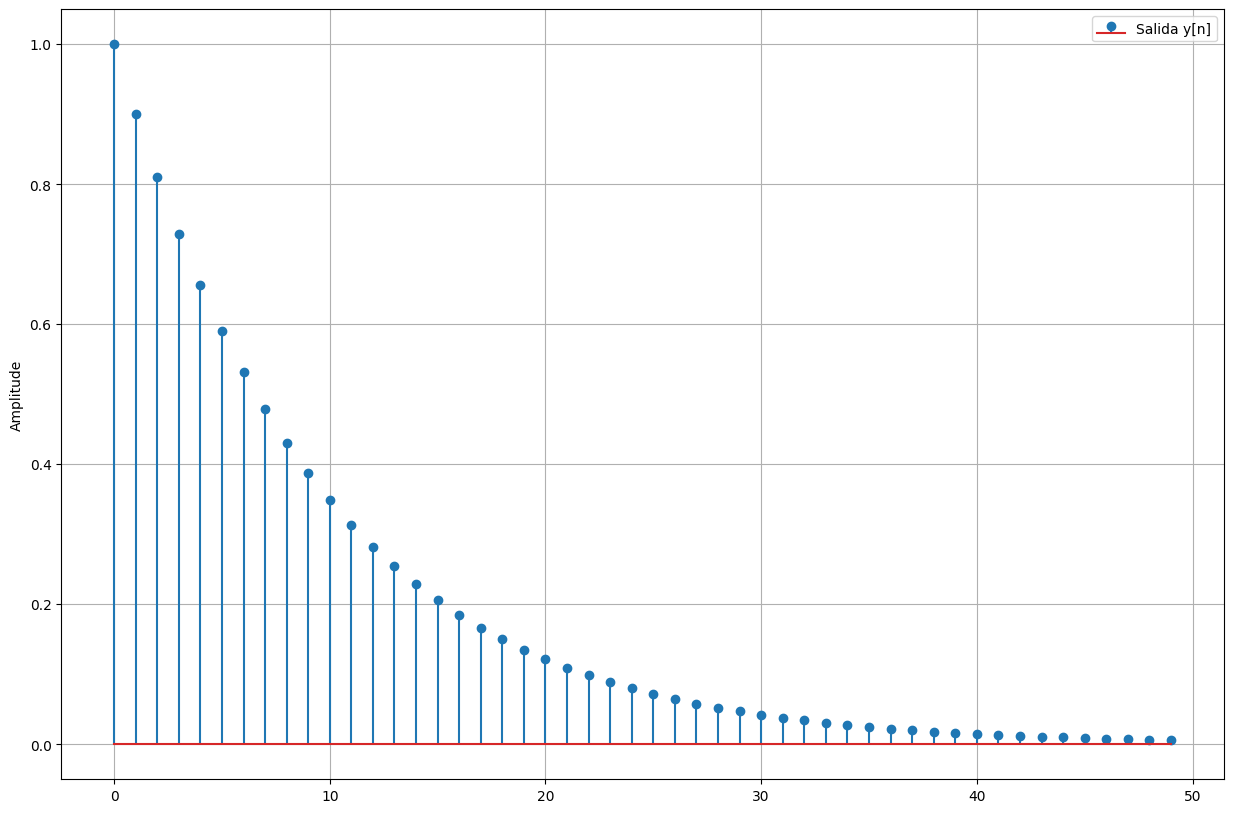

In [23]:
plt.figure(figsize=(15, 10))
plt.ylabel('Amplitude')
plt.stem(y, label='Salida y[n]')  
plt.legend(loc='best')
plt.grid()
plt.show()

Consideremos ahora el caso de un sistema no lineal. Sea un caso sencillo en el cual la salida del sistema se encuentra dada por:

$$y[n]= 0.9 y[n] + |x[n]|^2 $$

Usando la condición de reposo inicial $y[-1]=0$ podemos calcular la respuesta al impulso (<b> Ojo! no podemos usar el comando lfilter! <\b>). Por su sencillez podemos hacer como hicimos en clase para $y[n]= 0.9 y[n] + x[n]$:

$$y[0]=|x[0]|^2=|\delta[0]|^2 = 1$$
$$y[1]=0.9 y[0]= 0.9$$
$$y[2]= 0.9 y[1]=0.9^2$$
$$y[3]= 0.9 y[2]=0.9^3$$
$$ \vdots $$

O sea la solución es $h[n]=0.9^n u[n]$.

Vamos a usar esta respuesta al impulso para calcular la respuesta a una exponencial compleja que comienza en tiempo $n=0$, o sea cuando $x[n]= Ae^{j2\pi f_0 n}u[n]$. Para ello usamos la función convolve. Generemos
primero el escalón:

In [24]:
# Signal duration in samples
D = 120
# Sampling rate in Hz
fs = 1      
#Sampling period
T = 1/fs

amplitude = 1
freq = 0.1
sample_rate = fs
duration = D
phase = 0   
nx,x=generate_complex_exponential(amplitude,freq, sample_rate, duration, phase)

#Generemos también h[n]

alpha_c = np.log(0.9)
position = 0.5   #Position of impulse. Value between 0 a 1. The start of exponential will be positioned in the index closer 
                 #to duration*position 
nh,h=generate_right_exponential(amplitude,alpha_c, sample_rate, duration, position)  

In [25]:
y=signal.convolve(h, x, mode='same', method='direct')

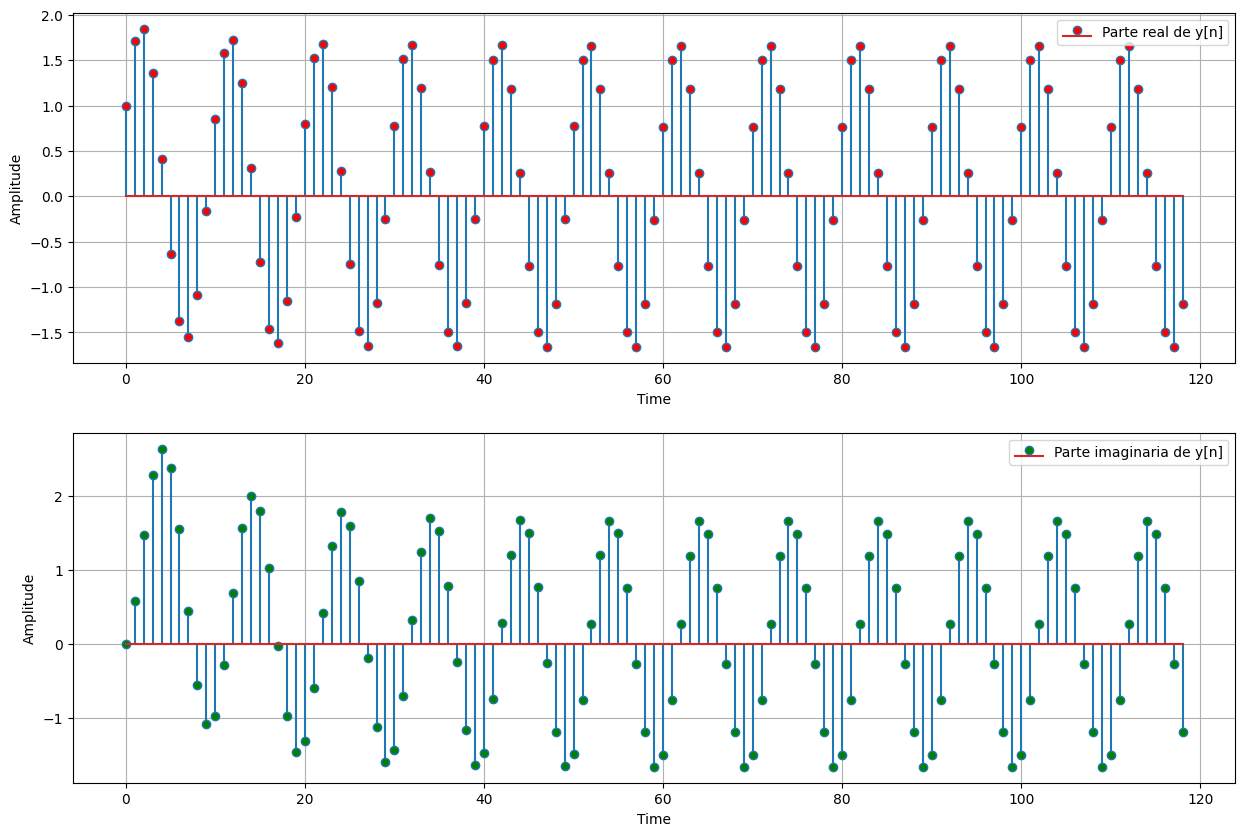

In [26]:
fig,axs = plt.subplots(2, figsize=(15, 10))
markerline1, stemlines1, baseline1 = axs[0].stem(np.real(y[1:,]), label='Parte real de y[n]')  
markerline1.set_markerfacecolor('red')
markerline2, stemlines2, baseline2 = axs[1].stem(np.imag(y[1:,]), label='Parte imaginaria de y[n]')  
markerline2.set_markerfacecolor('green')
for ax in axs:
    ax.set(xlabel='Time', ylabel='Amplitude')
    ax.grid()
    ax.legend(loc='upper right')

<b> Estamos claros que esto que hicimos está mal no?? La respuesta al impulso de un sistema que no es LTI no nos sirve en general para calcular la respuesta 
del mismo a cualquier otra entrada!!

Para calcular entonces la respuesta otra entrada necesitamos lidiar con el sistema y hacer el cálculo para cada entrada que se me ocurra. No tenemos en general un método general para realizar dicho cálculo y que se universal para cualquier sistema y cualquier entrada! Esto está en claro contraste con el resultado para un sistema LTI!

Afortunadamente el sistema que planteamos es lo suficientemente simple y podemos calcular su salida para la entrada considerada.

Dado que $|x[n]|^2=1 \ \forall \neq>0$ para  $x[n]=e^{j2\pi f_0 n}u[n]$ y igual a cero para $n<0$, entonces es claro que para esta señal $x[n]$ en particular:

$|x[n]|^2=u[n]\ \forall n\in\mathbb{Z}$

Entonces la salida del sistema planteado cuando $x[n]=e^{j2\pi f_0 n}u[n]$ obedece a:

$$y[n]= 0.9 y[n] + u[n] $$

Y esto ya sabemos resolverlo con lfilter!!

In [27]:
amplitude = 1
alpha = 0
sample_rate = fs
duration = D
position = 0   #Position of impulse. Value between 0 a 1. The start of exponential will be positioned in the index closer 
                 #to duration*position 
nu,u=generate_right_exponential(amplitude,alpha, sample_rate, duration, position)  

In [28]:
y=signal.convolve(h, u, mode='same', method='direct')

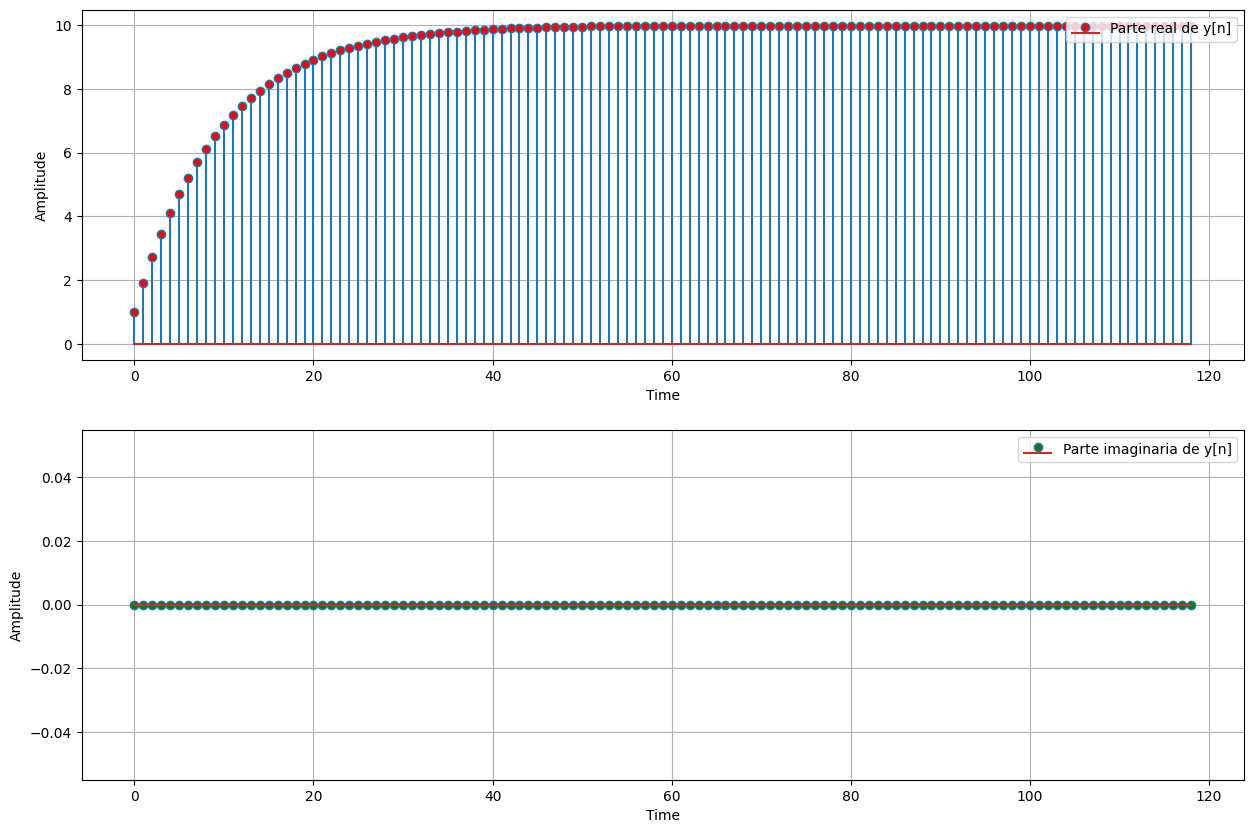

In [29]:
fig,axs = plt.subplots(2, figsize=(15, 10))
markerline1, stemlines1, baseline1 = axs[0].stem(np.real(y[1:,]), label='Parte real de y[n]')  
markerline1.set_markerfacecolor('red')
markerline2, stemlines2, baseline2 = axs[1].stem(np.imag(y[1:,]), label='Parte imaginaria de y[n]')  
markerline2.set_markerfacecolor('green')
for ax in axs:
    ax.set(xlabel='Time', ylabel='Amplitude')
    ax.grid()
    ax.legend(loc='upper right')

<b> Claramente esta salida (que es la correcta!) para el sistema no lineal considerado no tiene nada que ver con la calculada usando la respuesta al impulso del sistema real!!!</b>